# Imports

#### Basic Imports

In [1]:
import analysis
import itertools as itr
import numpy as np
import xarray as xr

#### Plotting imports and style

In [2]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import seaborn as sns
sns.set()

mpl.rcParams['axes.labelsize'] = 15
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12

# Algorithm parameters

In [3]:
nsamples_list = [1000, 10000]
colors = plt.get_cmap('winter')(np.linspace(0, 1, 2))
skel_color = colors[0]
ddag_color = colors[1]
linestyles = ['-', '--']
vs = list(range(10))

#### handles for plots

In [4]:
metric_handles = [
    mpatches.Patch(color=skel_color, label=r'difference-DAG skeleton ($\bar{\Delta}$)'),
    mpatches.Patch(color=ddag_color, label=r'difference-DAG ($\Delta$)'),
]
sample_handles = [
    mlines.Line2D([], [], color='k', linestyle=linestyle, label='$n$={:,}'.format(nsamples)) 
    for nsamples, linestyle in zip(nsamples_list, linestyles)
]

# Data

In [5]:
skeleton_data = xr.DataArray(
    np.zeros([len(vs), len(nsamples_list)]),
    dims=['v', 'nsamples'],
    coords={'v': vs, 'nsamples': nsamples_list}
)
for v in vs:
    s = analysis.get_skeleton_da('fig1c_data/v%d' % v, ['dci-c'], nsamples_list, [.05])
    exact_recovery = analysis.edges_da2_exact_recovery(s).values.squeeze()
    skeleton_data.loc[dict(v=v)] = exact_recovery

In [6]:
ddag_data = xr.DataArray(
    np.zeros([len(vs), len(nsamples_list)]),
    dims=['v', 'nsamples'],
    coords={'v': vs, 'nsamples': nsamples_list}
)
for v in vs:
    e = analysis.get_edges_da('fig1c_data/v%d' % v, ['dci-c'], nsamples_list, [.05])
    exact_recovery = analysis.edges_da2_exact_recovery(e).values.squeeze()
    ddag_data.loc[dict(v=v)] = exact_recovery

# Figure 1c

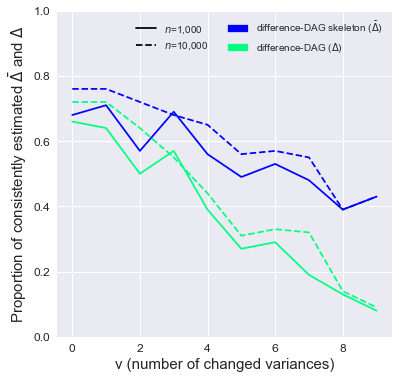

In [7]:
plt.figure(figsize=(6,6))

for nsamples, linestyle in zip(nsamples_list, linestyles):
    exact_recovery_skel = skeleton_data.sel(nsamples=nsamples)
    exact_recovery_ddag = ddag_data.sel(nsamples=nsamples)
    plt.plot(vs, exact_recovery_skel, color=skel_color, linestyle=linestyle)
    plt.plot(vs, exact_recovery_ddag, color=ddag_color, linestyle=linestyle)
plt.xlabel('v (number of changed variances)')
plt.ylim([0, 1])
plt.ylabel(r"Proportion of consistently estimated $\bar{\Delta}$ and $\Delta$")
plt.legend(handles=sample_handles+metric_handles, ncol=2, loc='upper right', shadow=True);